In [1]:
import pandas as pd
import random
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv'
test_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv'

train_df = pd.read_csv(train_path)
train_df.shape

#시계열 데이터
for i in train_df.columns:
  print(i)

X = train_df.drop(columns=['ID', 'Unnamed: 0.1', 'Segment.1', 'Segment'])
Y = train_df['Segment']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한

금융 정보 & 연체/잔액 관련
신용 위험 & 금융 습관 분석

In [2]:
import pandas as pd
# 1) 파일 경로 지정
train_path = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv'
test_path  = '/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv'

# 2) 데이터 로드
train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)

# 3) 금융정보_연체잔액 키워드 정의
keywords = [
    '한도','이자율','RV약정청구율','RV최소결제비율',
    '잔액','평잔','변동률','연체','RP'
]

# 4) train에서 키워드 매칭 컬럼 추출
financial_train = [c for c in train.columns if any(k in c for k in keywords)]

# 5) test에도 동일한 컬럼이 있는지 확인 (train↔test 간 mismatch 방지)
financial_common = [c for c in financial_train if c in test.columns]

print(f"매칭된 공통 컬럼 수: {len(financial_common)}개")
print(financial_common)

매칭된 공통 컬럼 수: 168개
['연체건수_R6M', '연체건수_R3M', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월', '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M', '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '월상환론상향가능한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수', '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m', '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔', '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '회원여부_연체', '동의여부_한도증액안내', 'IB문의건수_한도_R6M', '잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M', '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M', '월중평잔_일시불_B0M', '월중평잔_할부_B0M', '월중평잔_CA_B0M', '연체일자_B0M', '연체잔액_B0M', '연체잔

In [3]:
# 1. 금융정보_연체 관련 키워드로 컬럼 필터링
keywords = ['한도','이자율','RV약정청구율','RV최소결제비율','잔액','평잔','변동률','연체','RP']
financial_common = [col for col in train.columns if any(k in col for k in keywords)]

# 2. 결측치 개수 및 비율 계산
missing_count = train[financial_common].isna().sum()
missing_pct = (missing_count / len(train)) * 100

# 3. 데이터프레임으로 정리
missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_pct(%)': missing_pct.round(2)
}).sort_values(by='missing_pct(%)', ascending=False)

print(f"총 샘플 수: {len(train)}")
print(missing_df.head(20))

# 4. 연체일자_B0M만 제거
if '연체일자_B0M' in financial_common:
    financial_common.remove('연체일자_B0M')

# 5. 결측치 0으로 대체한 입력 변수 생성
X = train[financial_common].fillna(0)


총 샘플 수: 70560
                missing_count  missing_pct(%)
연체일자_B0M                70402           99.78
연체건수_R6M                    0            0.00
최초한도금액                      0            0.00
연체건수_R3M                    0            0.00
CA한도금액                      0            0.00
일시상환론한도금액                   0            0.00
월상환론한도금액                    0            0.00
카드이용한도금액                    0            0.00
CL이자율_할인전                   0            0.00
RV일시불이자율_할인전                0            0.00
RV현금서비스이자율_할인전              0            0.00
RV약정청구율                     0            0.00
RV최소결제비율                    0            0.00
자발한도감액횟수_R12M               0            0.00
자발한도감액금액_R12M               0            0.00
자발한도감액후경과월                  0            0.00
강제한도감액횟수_R12M               0            0.00
강제한도감액금액_R12M               0            0.00
강제한도감액후경과월                  0            0.00
한도증액횟수_R12M                 0            0.00


In [4]:
# 문자형(object) 변수 확인
non_numeric_cols = train[financial_common].select_dtypes(include='object').columns.tolist()

print("✅ 인코딩 필요한 범주형 변수:", non_numeric_cols)

✅ 인코딩 필요한 범주형 변수: ['자발한도감액횟수_R12M', '한도증액횟수_R12M', '한도심사요청건수']


In [5]:
from sklearn.preprocessing import LabelEncoder

# ✅ 인코딩 대상 컬럼
categorical_cols = ['자발한도감액횟수_R12M', '한도증액횟수_R12M', '한도심사요청건수']

# ✅ 인코딩 적용 (in-place)
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))  # 결측치 포함된 경우 문자열 처리

print("✅ 인코딩 완료:", categorical_cols)

✅ 인코딩 완료: ['자발한도감액횟수_R12M', '한도증액횟수_R12M', '한도심사요청건수']


In [6]:
# 연체일자_B0M 제거 및 결측치 처리까지 포함
financial_common = [col for col in train.columns if any(k in col for k in keywords)]
financial_common = [col for col in financial_common if col != '연체일자_B0M']

X = train[financial_common].fillna(0)

print("📌 X 변수 타입 분포:")
print(X.dtypes.value_counts())

📌 X 변수 타입 분포:
int64      144
float64     23
Name: count, dtype: int64


Segment별 평균 비교

In [7]:
# 1. Segment 컬럼 추가
X['Segment'] = train['Segment']

# 2. Segment별 전체 변수 평균값 계산 (전치: 변수별로 행 정렬)
segment_means = X.groupby('Segment').mean().T

# 3. 상위 몇 개 변수 확인 (선택)
print("✅ Segment별 변수 평균값 (상위 10개):")
print(segment_means.head(10))

✅ Segment별 변수 평균값 (상위 10개):
Segment                   A              B              C             D  \
연체건수_R6M           0.857143       0.750000       0.570210      0.587926   
연체건수_R3M           0.464286       0.500000       0.282174      0.300876   
최초한도금액         12887.035714       0.000000    7745.040767   4941.574976   
카드이용한도금액      194237.857143  131900.500000   96734.625100  69020.270691   
CA한도금액         53631.000000   39224.000000   30522.580602  22443.213048   
일시상환론한도금액      41019.321429       0.000000   46704.089795  39749.511295   
월상환론한도금액      104507.178571   83900.500000  100977.622968  99727.247907   
CA이자율_할인전         17.816553      18.844100      16.708956     16.257648   
CL이자율_할인전         15.779372      15.579791      15.115316     14.915614   
RV일시불이자율_할인전      12.534022      12.887384      12.267034     12.084380   

Segment                  E  
연체건수_R6M          0.398089  
연체건수_R3M          0.199540  
최초한도금액         3173.155278  
카드이용한도금액      45217.979789  
C

주요 변수 찾기

In [8]:
# 📌 Segment별 평균값 기준 → 상대적으로 높은 변수 추출
top_features_per_segment = {}

for seg in segment_means.columns:
    # 해당 Segment에서 평균값 높은 상위 10개 변수 추출
    top_vars = segment_means[seg].sort_values(ascending=False).head(10)
    top_features_per_segment[seg] = top_vars

# ✅ 결과 출력
for seg, vars in top_features_per_segment.items():
    print(f"\n🔎 Segment {seg}에서 평균값이 높은 주요 변수:")
    for var, val in vars.items():
        print(f"   - {var}: {val:.2f}")


🔎 Segment A에서 평균값이 높은 주요 변수:
   - 카드이용한도금액_B2M: 196009.54
   - 카드이용한도금액_B1M: 194552.39
   - 카드이용한도금액: 194237.86
   - 월상환론한도금액: 104507.18
   - 월중평잔: 100432.18
   - 평잔_6M: 96635.39
   - 평잔_3M: 87828.39
   - CA한도금액: 53631.00
   - 일시상환론한도금액: 41019.32
   - 월중평잔_일시불_B0M: 25404.14

🔎 Segment B에서 평균값이 높은 주요 변수:
   - 카드이용한도금액_B1M: 133765.00
   - 카드이용한도금액: 131900.50
   - 카드이용한도금액_B2M: 130130.25
   - 월중평잔: 85756.00
   - 월상환론한도금액: 83900.50
   - 평잔_6M: 74469.00
   - 평잔_3M: 71130.75
   - CA한도금액: 39224.00
   - 평잔_CA_3M: 25281.25
   - 월중평잔_일시불: 25044.25

🔎 Segment C에서 평균값이 높은 주요 변수:
   - 월상환론한도금액: 100977.62
   - 카드이용한도금액: 96734.63
   - 카드이용한도금액_B1M: 96502.97
   - 카드이용한도금액_B2M: 96252.95
   - 일시상환론한도금액: 46704.09
   - 평잔_6M: 39039.46
   - 평잔_3M: 35719.55
   - 월중평잔: 35068.65
   - CA한도금액: 30522.58
   - 평잔_일시불_6M: 13865.30

🔎 Segment D에서 평균값이 높은 주요 변수:
   - 월상환론한도금액: 99727.25
   - 카드이용한도금액: 69020.27
   - 카드이용한도금액_B2M: 68589.06
   - 카드이용한도금액_B1M: 68537.06
   - 일시상환론한도금액: 39749.51
   - 평잔_6M: 22815.26
   - C

FI분석 - RF

<ipython-input-9-002d9c733611>:38: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


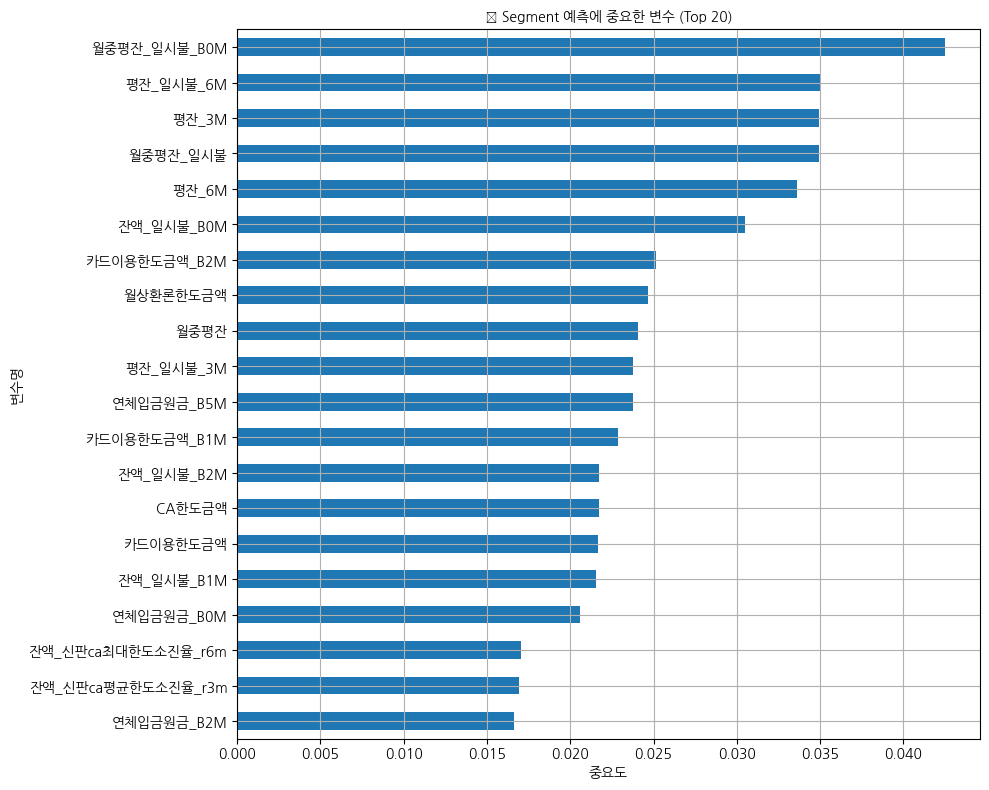

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 🎯 타겟값 설정
y = X['Segment']
X_model = X.drop(columns='Segment')

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_model, y, test_size=0.2, stratify=y, random_state=42)

# 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Feature Importance 추출
importances = clf.feature_importances_
features = pd.Series(importances, index=X_model.columns).sort_values(ascending=False)

# 상위 20개 시각화
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
nanum_font = fm.FontProperties(fname=font_path)

plt.figure(figsize=(10, 8))
features.head(20).plot(kind='barh')
plt.title("📌 Segment 예측에 중요한 변수 (Top 20)", fontproperties=nanum_font)
plt.xlabel("중요도", fontproperties=nanum_font)
plt.ylabel("변수명", fontproperties=nanum_font)
plt.xticks(fontproperties=nanum_font)
plt.yticks(fontproperties=nanum_font)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

모델 평가

📊 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00         6
           B       0.00      0.00      0.00         1
           C       0.64      0.39      0.48       750
           D       0.56      0.39      0.46      2054
           E       0.89      0.96      0.93     11301

    accuracy                           0.85     14112
   macro avg       0.42      0.35      0.37     14112
weighted avg       0.83      0.85      0.83     14112



<ipython-input-10-f86e2e339c28>:21: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


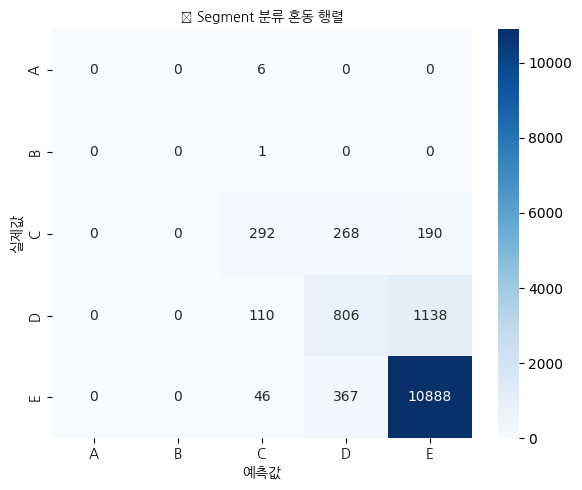

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 예측
y_pred = clf.predict(X_val)

# 분류 결과 리포트
print("📊 Classification Report:")
print(classification_report(y_val, y_pred))

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_val, y_pred, labels=clf.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("📌 Segment 분류 혼동 행렬", fontproperties=nanum_font)
plt.xlabel("예측값", fontproperties=nanum_font)
plt.ylabel("실제값", fontproperties=nanum_font)
plt.xticks(fontproperties=nanum_font)
plt.yticks(fontproperties=nanum_font)
plt.tight_layout()
plt.show()

Segment : E, D, (A,B,C)로 모델 학습 및 성능 평가

📊 Segment 단순화 (3분류) Classification Report:
              precision    recall  f1-score   support

          AB       0.68      0.40      0.50       757
           D       0.57      0.40      0.47      2054
           E       0.89      0.96      0.93     11301

    accuracy                           0.85     14112
   macro avg       0.71      0.59      0.63     14112
weighted avg       0.83      0.85      0.84     14112



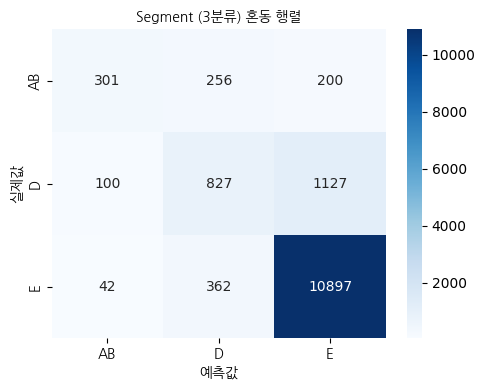

In [11]:
# Segment 단순화 함수 정의
def simplify_segment(seg):
    if seg == 'E':
        return 'E'
    elif seg == 'D':
        return 'D'
    else:
        return 'AB'

# 새로운 Segment 컬럼 생성
X['Segment_3'] = train['Segment'].apply(simplify_segment)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 타겟 및 입력 변수
y3 = X['Segment_3']
X3_model = X.drop(columns=['Segment', 'Segment_3'])  # 입력 변수만 남김

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X3_model, y3, test_size=0.2, stratify=y3, random_state=42)

# 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_val)

# 성능 리포트
print("📊 Segment 단순화 (3분류) Classification Report:")
print(classification_report(y_val, y_pred))

# 혼동 행렬 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
nanum_font = fm.FontProperties(fname=font_path)

conf_mat = confusion_matrix(y_val, y_pred, labels=clf.classes_)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Segment (3분류) 혼동 행렬", fontproperties=nanum_font)
plt.xlabel("예측값", fontproperties=nanum_font)
plt.ylabel("실제값", fontproperties=nanum_font)
plt.xticks(fontproperties=nanum_font)
plt.yticks(fontproperties=nanum_font)
plt.tight_layout()
plt.show()

SMOTE로 클래스 불균형 보정

✅ SMOTE 적용 후 클래스 분포: Counter({'E': 56505, 'D': 56505, 'AB': 56505})
📊 SMOTE 적용 후 Segment (3분류) Classification Report:
              precision    recall  f1-score   support

          AB       0.96      0.97      0.97     11301
           D       0.90      0.92      0.91     11301
           E       0.94      0.91      0.92     11301

    accuracy                           0.93     33903
   macro avg       0.93      0.93      0.93     33903
weighted avg       0.93      0.93      0.93     33903



<ipython-input-12-866432415213>:51: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


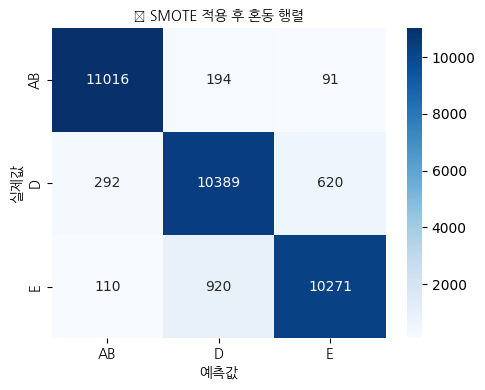

In [12]:
from imblearn.over_sampling import SMOTE

# 타겟: Segment_3
y_smote = X['Segment_3']
X_smote = X.drop(columns=['Segment', 'Segment_3'])

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_smote, y_smote)

# 클래스 분포 확인
from collections import Counter
print("✅ SMOTE 적용 후 클래스 분포:", Counter(y_resampled))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 분할 (SMOTE 이후)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# 모델 학습
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 예측
y_pred = clf.predict(X_val)

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm

# 한글 폰트 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
nanum_font = fm.FontProperties(fname=font_path)

# 리포트 출력
print("📊 SMOTE 적용 후 Segment (3분류) Classification Report:")
print(classification_report(y_val, y_pred))

# 혼동 행렬 시각화
conf_mat = confusion_matrix(y_val, y_pred, labels=clf.classes_)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("📌 SMOTE 적용 후 혼동 행렬", fontproperties=nanum_font)
plt.xlabel("예측값", fontproperties=nanum_font)
plt.ylabel("실제값", fontproperties=nanum_font)
plt.xticks(fontproperties=nanum_font)
plt.yticks(fontproperties=nanum_font)
plt.tight_layout()
plt.show()

KMeans 군집화로 고객 패턴 탐색

In [13]:
from sklearn.preprocessing import StandardScaler

# Segment, Segment_3 제거
X_cluster = X.drop(columns=['Segment', 'Segment_3'])

# 표준화 (KMeans는 거리 기반이므로 반드시 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

최적 K 결정: 실루엣 점수 기반

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50659 (\N{HANGUL SYLLABLE ES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

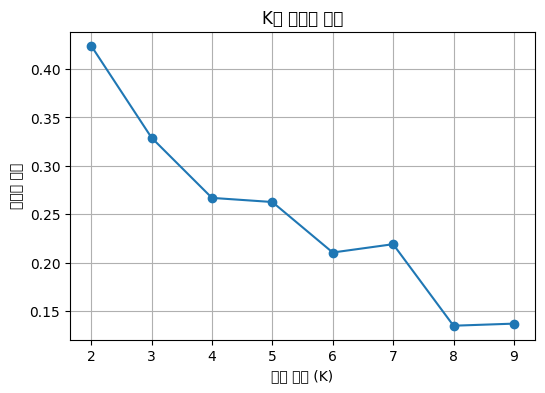

✅ 실루엣 점수 기준 최적 K는 2 입니다.


In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# 시각화
plt.figure(figsize=(6,4))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('K별 실루엣 점수')
plt.xlabel('군집 개수 (K)')
plt.ylabel('실루엣 점수')
plt.grid(True)
plt.show()

# 최적 K 제안
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"✅ 실루엣 점수 기준 최적 K는 {best_k} 입니다.")

실루엣 점수 해석

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
X['Cluster'] = kmeans.fit_predict(X_scaled)

군집 시각화

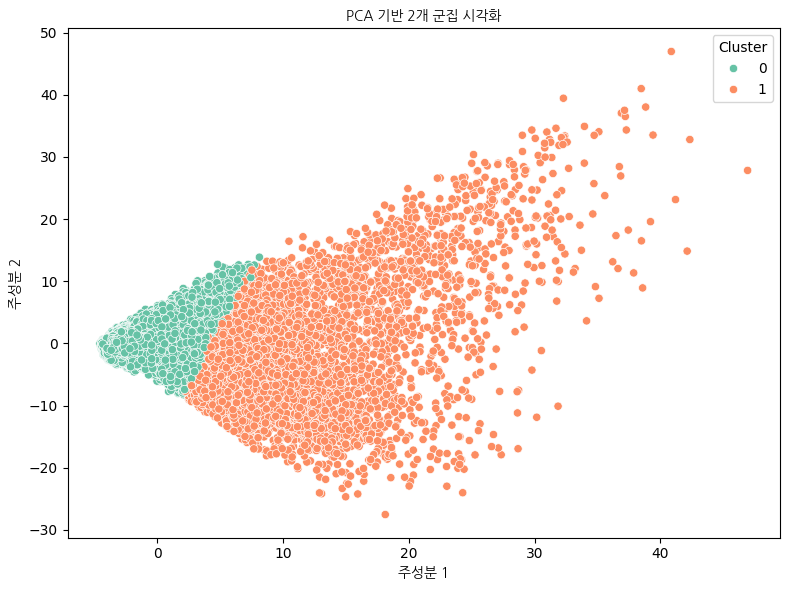

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 한글 폰트
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
nanum_font = fm.FontProperties(fname=font_path)

# PCA로 2차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['Cluster'], palette='Set2')
plt.title("PCA 기반 2개 군집 시각화", fontproperties=nanum_font)
plt.xlabel("주성분 1", fontproperties=nanum_font)
plt.ylabel("주성분 2", fontproperties=nanum_font)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

금융습관 특성 확인을 위한 각 군집의 변수 평균 비교

In [17]:
# 수치형 컬럼만 필터링 후 평균 계산
numeric_cols = X.select_dtypes(include=['number']).columns
cluster_means = X[numeric_cols].groupby(X['Cluster']).mean().T

# 결과 확인
print(cluster_means.head(10))

# 상위 10개 변수 비교
print("📊 Cluster 0 평균 상위 변수:")
print(cluster_means[0].sort_values(ascending=False).head(10))

print("\n📊 Cluster 1 평균 상위 변수:")
print(cluster_means[1].sort_values(ascending=False).head(10))

Cluster                   0             1
연체건수_R6M           0.251188      1.639350
연체건수_R3M           0.116903      0.886167
최초한도금액          3796.280725   2898.829250
카드이용한도금액       52299.785895  46160.762170
CA한도금액         17424.313577  15298.904996
일시상환론한도금액      37509.449120   4628.193538
월상환론한도금액      100233.550929  37213.671873
CA이자율_할인전         15.350138     18.948666
CL이자율_할인전         14.348362     17.365225
RV일시불이자율_할인전      11.354602     14.612521
📊 Cluster 0 평균 상위 변수:
월상환론한도금액        100233.550929
카드이용한도금액_B2M     52466.247643
카드이용한도금액_B1M     52394.885335
카드이용한도금액         52299.785895
일시상환론한도금액        37509.449120
CA한도금액           17424.313577
평잔_6M             5228.448401
평잔_3M             4570.594743
월중평잔              4293.102576
최초한도금액            3796.280725
Name: 0, dtype: float64

📊 Cluster 1 평균 상위 변수:
평잔_6M           54937.157591
평잔_3M           51341.685247
월중평잔            47384.384401
카드이용한도금액_B2M    46329.576763
카드이용한도금액_B1M    46300.707607
카드이용한도금액        46160.76

비지도 vs 기존 분류 일치 확인

In [18]:
# Cluster vs Segment_3 교차비율 확인
pd.crosstab(X['Cluster'], X['Segment_3'], normalize='index') * 100

Segment_3,AB,D,E
Cluster,,,
0,3.848856,12.624769,83.526375
1,15.288328,27.195892,57.515780


KMeans결과로 피처 엔지니어링

In [19]:
import pandas as pd

# ✅ 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv')

# 연체일자_B0M 제거 및 결측치 처리까지 포함
financial_common = [col for col in train.columns if any(k in col for k in keywords)]
financial_common = [col for col in financial_common if col != '연체일자_B0M']

X = train[financial_common].fillna(0)

print("📌 X 변수 타입 분포:")
print(X.dtypes.value_counts())

📌 X 변수 타입 분포:
int64      144
float64     23
Name: count, dtype: int64


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ✅ 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv')

# ✅ 'Segment_3'이 있으면 제거
if 'Segment_3' in df.columns:
    df = df.drop(columns=['Segment_3'])

# ✅ 30% 이상 결측치가 있는 컬럼 제거
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > 0.3].index
df_clean = df.drop(columns=cols_to_drop)

# ✅ 숫자형 피처만 선택 + 결측치 제거
X_num = df_clean.select_dtypes(include=['float64', 'int64']).dropna()

# ✅ 인덱스 맞춰서 원본 df도 정리
df_final = df_clean.loc[X_num.index].reset_index(drop=True)
X_num = X_num.reset_index(drop=True)

# ✅ 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# ✅ KMeans 클러스터링
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# ✅ 클러스터 결과 추가
df_final['Cluster_KMeans'] = cluster_labels

# ✅ 클러스터 분포 출력
print(df_final['Cluster_KMeans'].value_counts())

Cluster_KMeans
0    38614
1    14280
Name: count, dtype: int64


Cluster_KMeans,0,1
rv최초시작후경과일,8.165973e+07,7.200314e+07
최종이용일자_기본,2.017988e+07,2.018096e+07
최종이용일자_신판,2.017933e+07,2.018096e+07
최종이용일자_일시불,2.017754e+07,2.018089e+07
최종카드발급일자,2.016516e+07,2.016719e+07
...,...,...
증감율_이용건수_할부_분기,-1.891443e-01,-2.666487e-01
최종연체회차,-6.800321e+01,-6.206912e+01
연체일수_B2M,-8.970313e+05,-8.311616e+05
연체일수_B1M,-9.059658e+05,-8.401252e+05


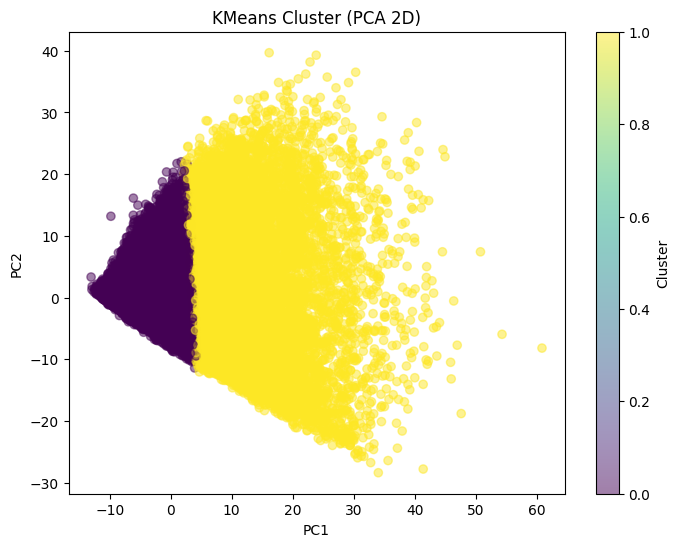

In [21]:
# ✅ 숫자형 컬럼만 추출
numeric_cols = df_final.select_dtypes(include='number').columns

# ✅ 클러스터별 평균 계산
cluster_summary = df_final.groupby('Cluster_KMeans')[numeric_cols].mean()

# ✅ 확인
import pandas as pd
pd.set_option('display.max_rows', 100)  # 원하면 더 늘릴 수 있음
display(cluster_summary.T.sort_values(by=0, ascending=False))  # Cluster 0 기준 내림차순
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Cluster (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()

클러스터 모델 학습 - RF

<ipython-input-22-6a598b6b181a>:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_num['Cluster_KMeans'] = df.loc[X_num.index, 'Cluster_KMeans']


🎯 [클러스터 포함 분류 결과]
[[    0     4     0     0]
 [    0   478   255    10]
 [    0    32  1998    20]
 [    0    11    22 11282]]
              precision    recall  f1-score   support

          AB       0.00      0.00      0.00         4
           C       0.91      0.64      0.75       743
           D       0.88      0.97      0.92      2050
           E       1.00      1.00      1.00     11315

    accuracy                           0.97     14112
   macro avg       0.70      0.65      0.67     14112
weighted avg       0.98      0.97      0.97     14112



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

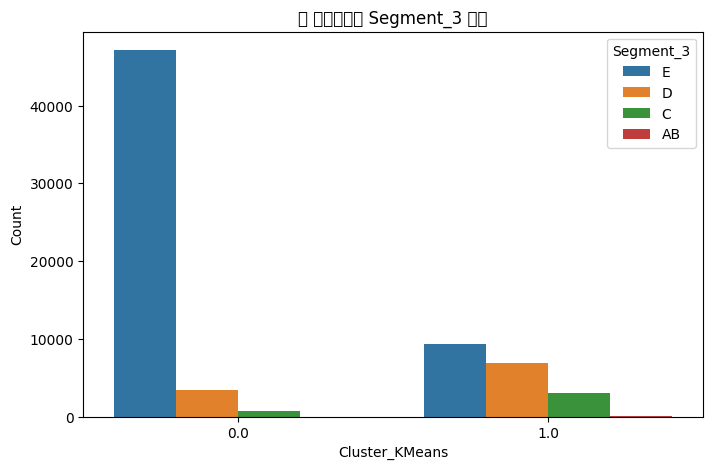

🧮 Cluster_KMeans와 Segment_3 일치율: 0.0000


In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Segment_3 생성
df['Segment_3'] = df['Segment'].apply(lambda x: 'AB' if x in ['A', 'B'] else x)

# 숫자형 피처 추출
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X_num = df[numeric_cols]

# ✅ 평균으로 결측치 대체
X_num = X_num.fillna(X_num.mean())

# ✅ 클러스터링 전 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# ✅ KMeans 클러스터링 (2개 군집)
kmeans = KMeans(n_clusters=2, random_state=42)
df.loc[X_num.index, 'Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# ✅ 분류용 데이터 준비 (Cluster_KMeans 포함)
X_num['Cluster_KMeans'] = df.loc[X_num.index, 'Cluster_KMeans']
X = X_num.copy()
y = df.loc[X.index, 'Segment_3']

# ✅ 분류 실험
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("🎯 [클러스터 포함 분류 결과]")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ 클러스터별 Segment_3 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(data=df.loc[X.index], x='Cluster_KMeans', hue='Segment_3')
plt.title("📊 클러스터별 Segment_3 분포")
plt.xlabel("Cluster_KMeans")
plt.ylabel("Count")
plt.legend(title="Segment_3")
plt.show()

# ✅ 군집 vs Segment_3 일치율 (단순비교)
agreement_rate = (df.loc[X.index, 'Cluster_KMeans'].astype(str) == df.loc[X.index, 'Segment_3']).mean()
print(f"🧮 Cluster_KMeans와 Segment_3 일치율: {agreement_rate:.4f}")

클러스터링 후 smote

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/IPython/c

📊 Classification Report:
               precision    recall  f1-score   support

          AB       0.00      0.00      0.00         6
           C       0.95      0.89      0.92       751
           D       0.88      0.96      0.92      2054
           E       0.99      0.98      0.99     11301

    accuracy                           0.97     14112
   macro avg       0.71      0.71      0.71     14112
weighted avg       0.97      0.97      0.97     14112



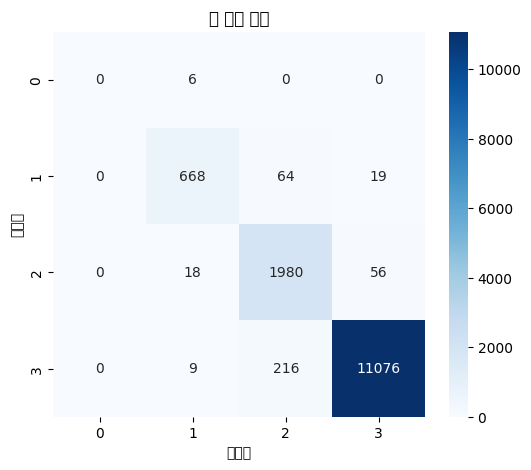

<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-23-8f44d0c78eea>:63: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ip

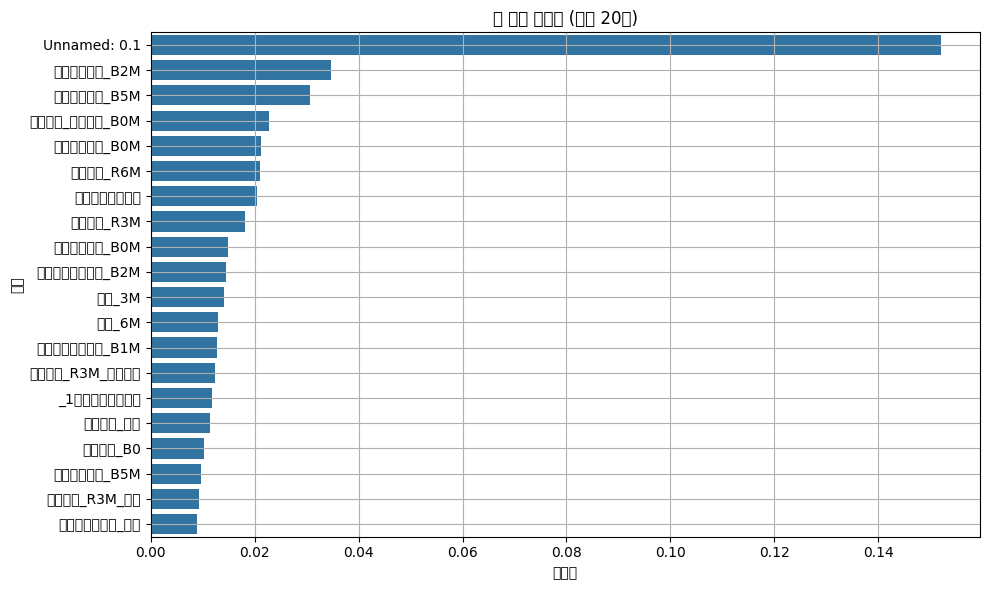

Cluster_KMeans 없음


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv')

# ✅ Segment_3 생성 (없는 경우만)
if 'Segment_3' not in df.columns:
    df['Segment_3'] = df['Segment'].replace({'A': 'AB', 'B': 'AB'})

# ✅ 숫자형 피처 선택 + 결측값 평균 대체
X = df.select_dtypes(include=[np.number]).copy()
X = X.fillna(X.mean())

# ✅ 타깃 분리
y = df.loc[X.index, 'Segment_3']

# ✅ 클러스터 변수가 존재하는 경우만 유지
if 'Cluster_KMeans' in df.columns:
    X['Cluster_KMeans'] = df['Cluster_KMeans']

# ✅ 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ✅ 랜덤포레스트 모델 학습
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# ✅ 예측 및 성능 평가
y_pred = clf.predict(X_test)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# ✅ 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("📌 혼동 행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

# ✅ 변수 중요도 시각화
importances = pd.Series(clf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("📌 변수 중요도 (상위 20개)")
plt.xlabel("중요도")
plt.ylabel("변수")
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ Cluster_KMeans 변수의 중요도 확인
print(f"📌 Cluster_KMeans 변수 중요도: {importances['Cluster_KMeans']:.5f}" if 'Cluster_KMeans' in importances else "Cluster_KMeans 없음")

클러스터링 최종 모델 튜닝

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.343015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81266
[LightGBM] [Info] Number of data points in the train set: 70560, number of used features: 651
[LightGBM] [Info] Start training from score -7.698483
[LightGBM] [Info] Start training from score -2.933908
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


📌 Best Params: {'subsample': 1.0, 'num_leaves': 31, 'n_estimators': 100, 'max_depth': -1, 'learning_rate': 0.01}

📊 Classification Report:
              precision    recall  f1-score   support

          AB       1.00      1.00      1.00        32
           C       1.00      1.00      1.00      3753
           D       1.00      1.00      1.00     10270
           E       1.00      1.00      1.00     56505

    accuracy                           1.00     70560
   macro avg       1.00      1.00      1.00     70560
weighted avg       1.00      1.00      1.00     70560



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53916 (\N{HANGUL SYLLABLE TYU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/p

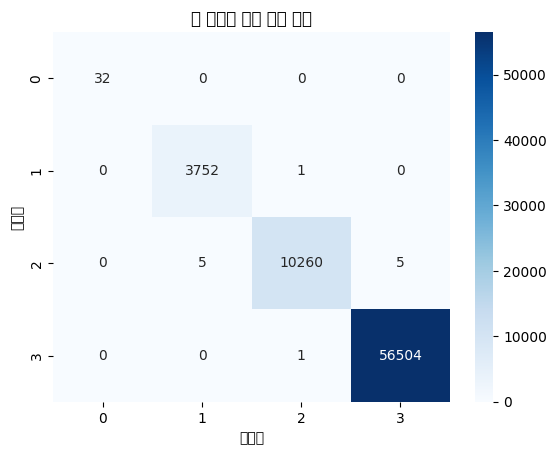

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 숫자형 피처만 선택
X = df.select_dtypes(include=['float64', 'int64'])

# ✅ 평균 대체 (결측치 처리)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# ✅ 타깃 라벨 추출
y = df['Segment_3']

# ✅ 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ✅ LightGBM 설정
model = LGBMClassifier(random_state=42)

param_dist = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0]
}

rscv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ✅ 모델 튜닝 실행
rscv.fit(X_scaled, y)

# ✅ 결과 출력
best_model = rscv.best_estimator_
y_pred = best_model.predict(X_scaled)

print("📌 Best Params:", rscv.best_params_)
print("\n📊 Classification Report:")
print(classification_report(y, y_pred))

# ✅ 혼동 행렬 시각화
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("📌 튜닝된 모델 혼동 행렬")
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
import joblib

# ✅ 학습 데이터 로드 (예시 경로)
df = pd.read_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/card_train.csv')  # 필요 시 수정

# ✅ 타깃 생성 및 분리
df['Segment_3'] = df['Segment'].replace({'A': 'AB', 'B': 'AB'})
X = df.select_dtypes(include=['float64', 'int64'])
y = df['Segment_3']

# ✅ 결측치 처리 및 스케일링
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# ✅ LightGBM 모델 튜닝
model = LGBMClassifier(random_state=42)
param_dist = {
    'num_leaves': [15, 31, 63],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0]
}
rscv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
rscv.fit(X_scaled, y)
best_model = rscv.best_estimator_

# ✅ 모델 저장
joblib.dump(best_model, '/content/cluster.model')

# ✅ 스케일러도 저장 (예측 시 동일 전처리를 위해)
joblib.dump(scaler, '/content/cluster_scaler.pkl')

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.785289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81266
[LightGBM] [Info] Number of data points in the train set: 70560, number of used features: 651
[LightGBM] [Info] Start training from score -7.698483
[LightGBM] [Info] Start training from score -2.933908
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


['/content/cluster_scaler.pkl']

In [4]:
# ✅ 테스트 데이터 불러오기
df_test = pd.read_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/card_test.csv')

# ✅ 피처 선택 및 전처리
X_test = df_test.select_dtypes(include=['float64', 'int64'])
X_test_imputed = imputer.transform(X_test)  # 학습시 사용한 imputer 사용
X_test_scaled = scaler.transform(X_test_imputed)

# ✅ 예측
y_pred = best_model.predict(X_test_scaled)

# ✅ 예측 결과 DataFrame 생성
submission = pd.DataFrame({
    'ID': df_test['ID'],  # ID 컬럼이 있다고 가정
    'Segment_3': y_pred
})

# ✅ 저장
submission.to_csv('/content/drive/MyDrive/블루문/신용카드 세그먼트/cluster_submission.csv', index=False)
print("✅ 예측 파일 저장 완료: /content/drive/MyDrive/블루문/신용카드 세그먼트/cluster_submission.csv")

✅ 예측 파일 저장 완료: /content/drive/MyDrive/블루문/신용카드 세그먼트/cluster_submission.csv


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [1]:
# ✅ 1. 작업 디렉토리 설정
%cd /content/drive/MyDrive/블루문/신용카드 세그먼트
!rm -rf segment-model  # 혹시 이전 클론 남아있다면 제거
!git https://github.com/king-gun1116/credit-segment
%cd segment-model

/content/drive/MyDrive/블루문/신용카드 세그먼트
git: 'https://github.com/king-gun1116/credit-segment' is not a git command. See 'git --help'.
[Errno 2] No such file or directory: 'segment-model'
/content/drive/MyDrive/블루문/신용카드 세그먼트
